# Imports

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
import scipy.signal as signal

# Define File Paths

In [2]:
parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_directory = os.path.join(parent_directory, "data")
database_path = os.path.join(data_directory, "database")

# Noisy Audio

In [3]:
# Load the noisy audio file
sample_rate, data = wavfile.read(
    os.path.join(
        data_directory,
        "experiment_4",
        "noise_(0, 1)",
        "authorized",
        "id10002",
        "VMaXdHLz5Bk_00004_loc_0_scale_1.wav",
    )
)

In [4]:
# Compute the frequency spectrum using FFT
fft_freqs = np.fft.fftfreq(len(data), 1 / sample_rate)
fft_magnitude = np.abs(np.fft.fft(data))

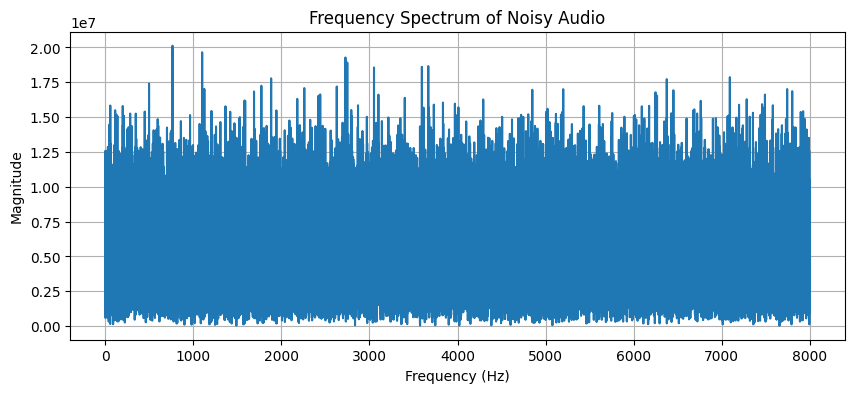

In [5]:
# Visualize the frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs[: len(fft_freqs) // 2], fft_magnitude[: len(fft_magnitude) // 2])
plt.title("Frequency Spectrum of Noisy Audio")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

In [6]:
# Assuming Gaussian noise is added to the audio, estimate its standard deviation
noise_std = np.std(data)

In [7]:
# Define parameters for the low-pass filter
cutoff_freq = 1000  # Adjust as needed
filter_order = 20  # Adjust as needed

# Design a low-pass filter
b, a = signal.butter(filter_order, cutoff_freq / (sample_rate / 2), btype="low")

In [8]:
# Apply the filter to remove noise
filtered_data = signal.filtfilt(b, a, data)

In [9]:
# Save the filtered audio to a new WAV file
wavfile.write(
    os.path.join(data_directory, "filtered_audio.wav"),
    sample_rate,
    np.int16(filtered_data),
)

# Clean Audio

In [10]:
# Load the clean audio file
sample_rate, data = wavfile.read(
    os.path.join(
        data_directory,
        "database",
        "authorized_users",
        "id10001",
        "1zcIwhmdeo4_00001.wav",
    )
)

In [11]:
# Step 2: Compute the frequency spectrum using FFT
fft_freqs = np.fft.fftfreq(len(data), 1 / sample_rate)
fft_magnitude = np.abs(np.fft.fft(data))

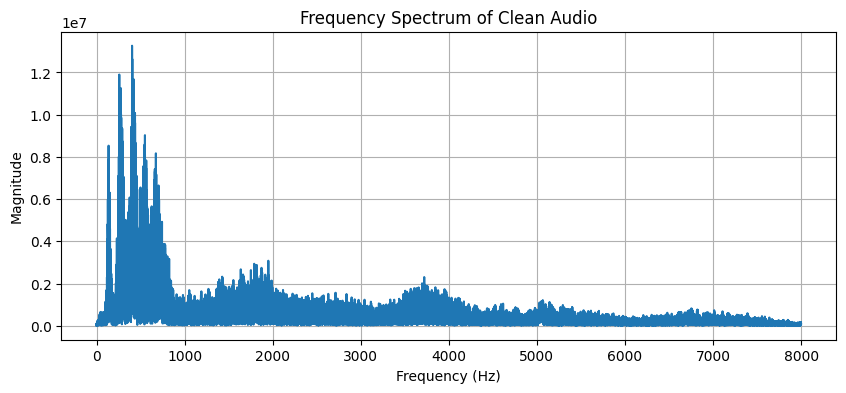

In [12]:
# Step 3: Visualize the frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs[: len(fft_freqs) // 2], fft_magnitude[: len(fft_magnitude) // 2])
plt.title("Frequency Spectrum of Clean Audio")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()